In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import roberta

/Users/deniskrylov/Developer/python/DB-InvestmentBot/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read in the data
data_folder = os.path.join(os.getcwd())
df = pd.read_csv(data_folder + '/data/news/all-data.csv', sep=',', header=None, encoding='latin-1')
df.head()

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


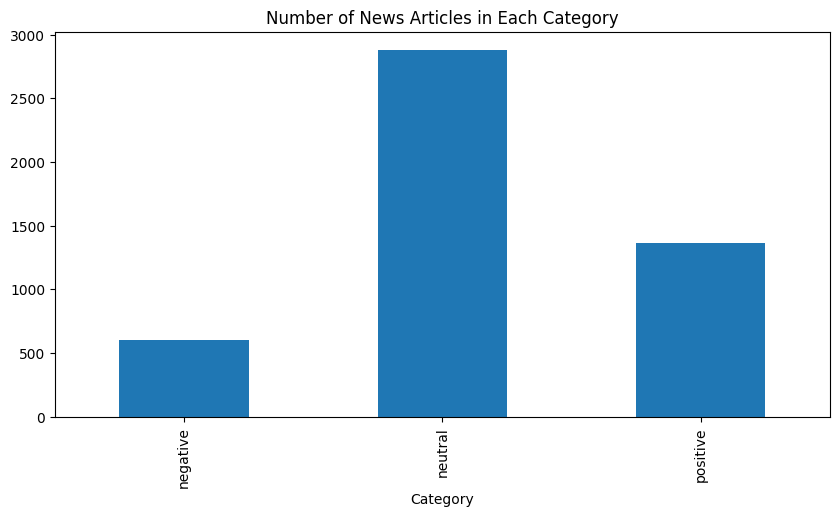

In [3]:
ax = df[0].value_counts().sort_index() \
    .plot(kind='bar', 
          title='Number of News Articles in Each Category', 
          figsize=(10, 5))
ax.set_xlabel('Category')
plt.show()

# WARNING: Dataset is slightly biased towards neutral news articles.

In [4]:
# Take first 20 news articles for speed
df = df.head(20)

res = {}
for i, row in df.iterrows():
    try:
        text = row[1]
        roberta_result = roberta.polarity_scores(text)
        res[i] = roberta_result
    except RuntimeError:
        print(f"Failed to encode row: {i}")
print(res)

{0: {'negative': 0.023855343, 'neutral': 0.6959839, 'positive': 0.28016075}, 1: {'negative': 0.013207654, 'neutral': 0.8397922, 'positive': 0.14700012}, 2: {'negative': 0.51106095, 'neutral': 0.45607838, 'positive': 0.032860614}, 3: {'negative': 0.0027569358, 'neutral': 0.26254302, 'positive': 0.7347}, 4: {'negative': 0.004494323, 'neutral': 0.69130766, 'positive': 0.30419803}, 5: {'negative': 0.002367295, 'neutral': 0.2778013, 'positive': 0.71983135}, 6: {'negative': 0.15126555, 'neutral': 0.71191376, 'positive': 0.13682069}, 7: {'negative': 0.007120916, 'neutral': 0.7428842, 'positive': 0.24999481}, 8: {'negative': 0.0065299803, 'neutral': 0.647084, 'positive': 0.34638602}, 9: {'negative': 0.014517601, 'neutral': 0.7914965, 'positive': 0.19398583}, 10: {'negative': 0.001948813, 'neutral': 0.20561944, 'positive': 0.7924318}, 11: {'negative': 0.0028055033, 'neutral': 0.45630455, 'positive': 0.5408899}, 12: {'negative': 0.017383661, 'neutral': 0.9392445, 'positive': 0.043371823}, 13: {'